In [1]:
import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from scipy.ndimage import gaussian_filter1d
import imageio
from IPython.display import HTML
import pytoolsAL as ptAL
mpl.rcParams['pdf.fonttype'] = 42

import sys
sys.path.append("C:/Users/nadia/Documents/GitHub/steinmetzlab/wf + opto/figure-making")
from wfOpto import *

pytoolsAL: Modules missing.  Not loading image.  Message: cannot import name 'geometry' from 'skimage._shared' (c:\Users\nadia\anaconda3\envs\steinmetzlab\Lib\site-packages\skimage\_shared\__init__.py)
It seems that scikit-image has not been built correctly.

Your install of scikit-image appears to be broken.
Try re-installing the package following the instructions at:
https://scikit-image.org/docs/stable/user_guide/install.html
pytoolsAL: Modules missing.  Not loading plotting.  Message: No module named 'seaborn'


In [2]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')
#personal
# plt.style.use(r'C:\GitHub\steinmetzlab\ALpres.mplstyle')

In [3]:
data = wfOpto(Path(r'Y:\Subjects\AL_0033\2025-01-07\1'))

# std for mean images for each location

- std fr the mean image for a particiular location
- plot in heatmap

In [15]:
sparseStds=[]
start=0.1
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        meanim_final = mov_mean_dff.reshape(560,560)
        sparseStds.append(np.std(meanim_final))


-0.0,-0.0 done
-0.0,1.0 done
-0.0,2.0 done
-0.0,3.0 done
-0.0,4.0 done
-0.0,5.0 done
1.0,-0.0 done
1.0,1.0 done
1.0,2.0 done
1.0,3.0 done
1.0,4.0 done
1.0,5.0 done
2.0,-0.0 done
2.0,1.0 done
2.0,2.0 done
2.0,3.0 done
2.0,4.0 done
2.0,5.0 done
3.0,-0.0 done
3.0,1.0 done
3.0,2.0 done
3.0,3.0 done
3.0,4.0 done
3.0,5.0 done
4.0,-0.0 done
4.0,1.0 done
4.0,2.0 done
4.0,3.0 done
4.0,4.0 done
4.0,5.0 done
5.0,-0.0 done
5.0,1.0 done
5.0,2.0 done
5.0,3.0 done
5.0,4.0 done
5.0,5.0 done


Text(0.5, 1.0, 'STD per mean image per location')

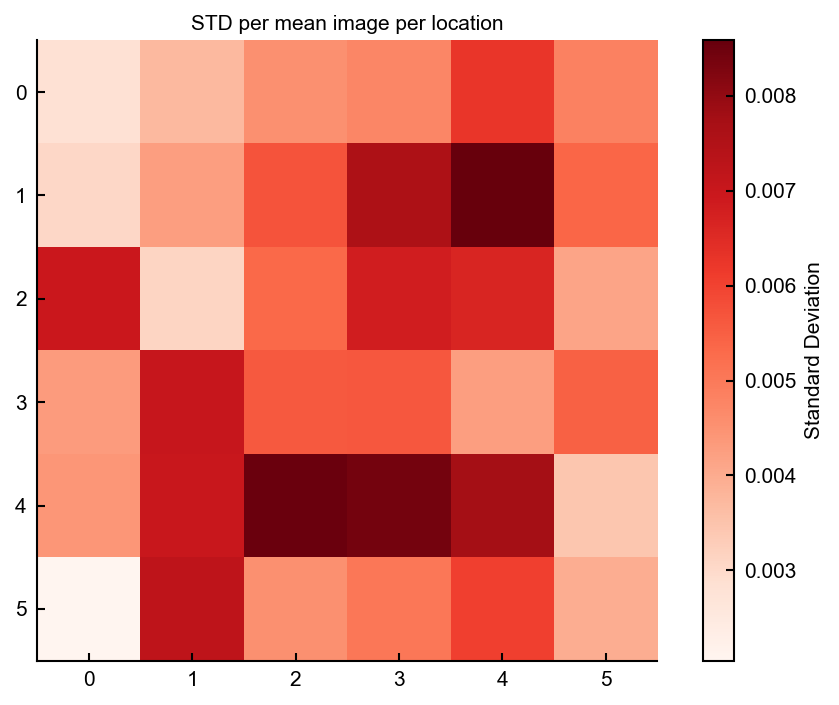

In [14]:
sparseStds = np.array(sparseStds).reshape(6,6)
plt.imshow(sparseStds, cmap='Reds')
plt.colorbar(label='Standard Deviation')
plt.title('STD per mean image per location')

# std for all trials per location

In [16]:
sparseStdstrs=[]
start=0.1
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        meanim_final = mov_mean_dff.reshape(560,560)
        sparseStds.append(np.std(meanim_final))
        print(f'{galvoX},{galvoY} done')

Text(0.5, 1.0, 'STD per mean image per location')

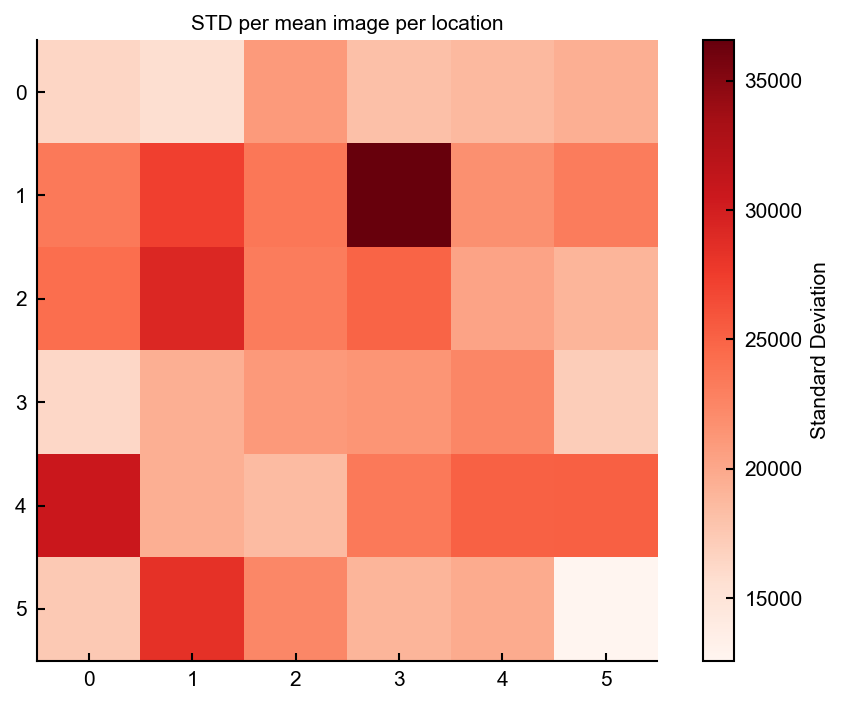

In [17]:
sparseStdstrs = np.array(sparseStdstrs).reshape(6,6)
plt.imshow(sparseStdstrs, cmap='Reds')
plt.colorbar(label='Standard Deviation')
plt.title('STD per mean image per location')